In [ ]:
# dataset: a set of 50,000 highly polarized reviews from the
# Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
# reviews for testing, each set consisting of 50% negative and 50% positive reviews
# train_labels and test_labels are
# lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 48s 3us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Nabeel\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Nabeel\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

In [3]:
import numpy as np

In [4]:
# encpding the sequance into a binary matrix

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
# NN Building
# Relu Return [0,1] If value is >= 0.5 then 1 if <0.5 so value is 0
#  we use last layer sigmoid bcs its good for binary class  los=(binary_crossintropy)

In [13]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
# model compliation

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
# if we neeed to set the value of aplha or optimizwer
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss='binary_crossentropy',
# metrics=['accuracy'])

In [17]:
#  same we can use custom loss and matric
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss=losses.binary_crossentropy,
# metrics=[metrics.binary_accuracy])

In [18]:
# validation split
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
#  model fitting for prediction

In [20]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 114ms/step - loss: 0.6931 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 8/20
3

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#  ploting the training and validation loss


In [27]:
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

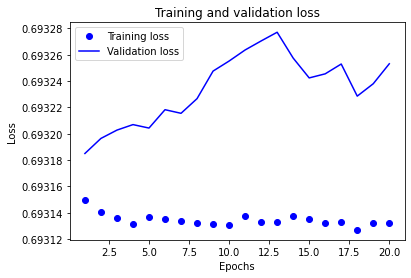

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#  plotting train validation accuracy

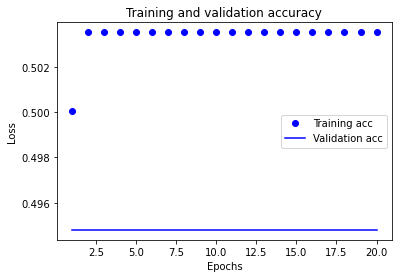

In [31]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
#  now retain the model

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 22ms/step - loss: 0.6932 - accuracy: 0.4964
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.6932 - accuracy: 0.4995 0s - loss: 0.6932 - accu
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.6932 - accuracy: 0.4954 0s - loss: 0.6
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5000


In [34]:
results

[0.6931523680686951, 0.5]

In [35]:
model.predict(x_test)

array([[0.52466327],
       [0.50085205],
       [0.50085205],
       ...,
       [0.50085205],
       [0.50085205],
       [0.50085205]], dtype=float32)

In [ ]:
#  now we need to imprve ther accuracy by using some model tunning steps thanks.